In [ ]:
!pip install tensorflow_datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.XICNEU_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [ ]:
# info

In [ ]:
for i, example in enumerate(dataset['train']):
  # example = (image, label)
  image, label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = save_dir + "/" + "{}_{}.jpg".format(class_names[label], i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())
  # print(filename)
  # break

- CNN Building Blocks
    - Input Layer
    - Convolutional Layer
    - Pooling Layer
    - Dropout Layer
    - Batch Normalization Layer
    - Activation Layer
    - Fully Connected Layer
    - Flatten Layer
    - Output Layer
    

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10,
                              width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.10, horizontal_flip=True)

train_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150, 150),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150, 150),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# 1st layer CNN
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2nd layer CNN
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 3rd layer CNN
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 169s 273ms/step - accuracy: 0.6013 - loss: 3.0569 - val_accuracy: 0.6285 - val_loss: 0.6693
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 150s 258ms/step - accuracy: 0.6944 - loss: 0.5805 - val_accuracy: 0.7310 - val_loss: 0.5348
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 149s 256ms/step - accuracy: 0.7350 - loss: 0.5310 - val_accuracy: 0.7063 - val_loss: 0.6272
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 148s 255ms/step - accuracy: 0.7572 - loss: 0.5002 - val_accuracy: 0.7433 - val_loss: 0.5036
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 149s 256ms/step - accuracy: 0.7789 - loss: 0.4675 - val_accuracy: 0.7429 - val_loss: 0.5337
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 149s 255ms/step - accuracy: 0.7902 - loss: 0.4485 - val_accuracy: 0.7966 - val_loss: 0.4554
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 146s 251ms/step - accuracy: 0.8034 - loss: 0.4270 - val_accuracy: 0.7489 - val_loss: 0.5111
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 147s 253ms/step - accuracy: 0.8180 -

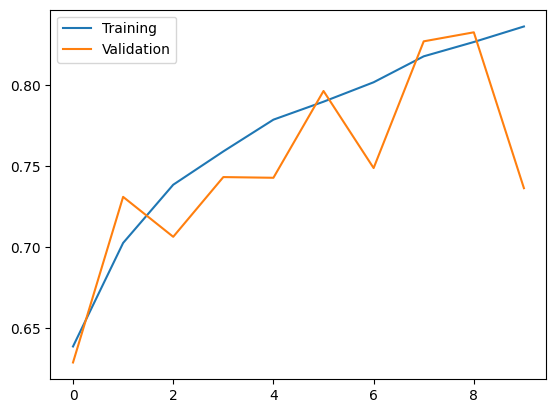

In [ ]:
history.history

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(['Training', 'Validation'])


In [ ]:
# save model
from google.colab import drive
drive.mount('/content/drive')

# Sau khi mount, lưu vào thư mục Drive của bạn
model.save('/content/drive/MyDrive/cats_vs_dogs.h5')

Mounted at /content/drive


In [ ]:
model_load = tf.keras.models.load_model('/content/drive/MyDrive/cats_vs_dogs.h5')

In [ ]:
from PIL import Image
import numpy as np
import requests
from tensorflow.keras.preprocessing import image
import cv2
def sharpen_image(pil_image):
    img_cv = np.array(pil_image)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(img_cv, -1, kernel)
    sharpened = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)
    return Image.fromarray(sharpened)

def predict_image(model, img_source, target_size=(150, 150)):


    if img_source.startswith('http://') or img_source.startswith('https://'):
        img = Image.open(requests.get(img_source, stream=True).raw).resize(target_size)
    else:
        img = Image.open(img_source).resize(target_size)

    img = sharpen_image(img)

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    THRESHOLD = 0.5
    label_index = int(prediction[0][0] > THRESHOLD)
    class_name = {v: k for k, v in train_generator.class_indices.items()}[label_index]

    return class_name

In [ ]:
# URL
url_img = "https://i.redd.it/chdijwuj7ah21.jpg"
print("Dự đoán từ URL:", predict_image(model_load, url_img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
Dự đoán từ URL: dog


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# file local
local_img_path = "/content/Dog_Breeds.jpg"
print("Dự đoán từ local:", predict_image(model_load, local_img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Dự đoán từ local: dog


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.9 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load model
model = load_model("/content/drive/MyDrive/cats_vs_dogs.h5")

def predict_image(uploaded_img, image_url):
    try:
        if image_url:
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content)).convert("RGB")
        elif uploaded_img:
            img = uploaded_img
        else:
            return "Vui lòng tải ảnh lên hoặc nhập link!", None

        resized = img.resize((150, 150))
        img_array = img_to_array(resized) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)[0][0]
        label = "Dog" if prediction > 0.5 else "Cat"

        return label, img
    except Exception as e:
        return f"Đã xảy ra lỗi: {str(e)}", None

gr.Interface(
    fn=predict_image,
    inputs=[
        gr.Image(type="pil", label="Upload ảnh (tuỳ chọn)"),
        gr.Textbox(label="Hoặc nhập link ảnh")
    ],
    outputs=[
        gr.Label(label="Dự đoán"),
        gr.Image(label="Ảnh đã chọn")
    ],
    title="🐾 Cat vs Dog Classifier",
    description="Tải ảnh lên hoặc dán link ảnh từ internet để phân loại mèo hay chó."
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3f49490ceff85054dd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
